## Test internal camera

In [16]:
## code as in https://github.com/Opentrons/opentrons/blob/b4831cffd0005b57e267c0c8d7c511e7607ca9f5/hardware-testing/hardware_testing/gravimetric/execute.py#L242
import glob
from subprocess import run as run_subprocess
import os

In [4]:
cameras = glob.glob("/dev/video*")
print(cameras)

['/dev/video3', '/dev/video2', '/dev/video1', '/dev/video0']


In [17]:
for camera in cameras:
    cam_pic_name = "image.jpg"
    cam_pic_path = cam_pic_name
    CAM_CMD_OT3 = (
    "v4l2-ctl --device {1} --set-fmt-video=width=1920,height=1080,pixelformat=MJPG "
    "--stream-mmap --stream-to={0} --stream-count=1"
    )
    process_cmd = CAM_CMD_OT3.format(str(cam_pic_path), camera)
    try:
        run_subprocess(process_cmd.split(" "), timeout=2)  # take a picture
    except subprocess.TimeoutExpired:
        os.remove(cam_pic_path)

<
The pixelformat 'MJPG' is invalid

The pixelformat 'MJPG' is invalid


In [36]:
!v4l2-ctl --device /dev/video --set-fmt-video=width=1920,height=1080, --stream-mmap --stream-to=my_image.jpg --stream-count=1
    

Cannot open device /dev/video4, exiting.


No success, so far. 

## Get image from stream (from raspicam, running mjpeg_server)
* for accessing the live-stream go to http://192.168.0.125:8000/stream.mjpg

In [15]:

import requests
from PIL import Image
from io import BytesIO
import re
from IPython.display import Image as ipython_Image
from IPython.display import display

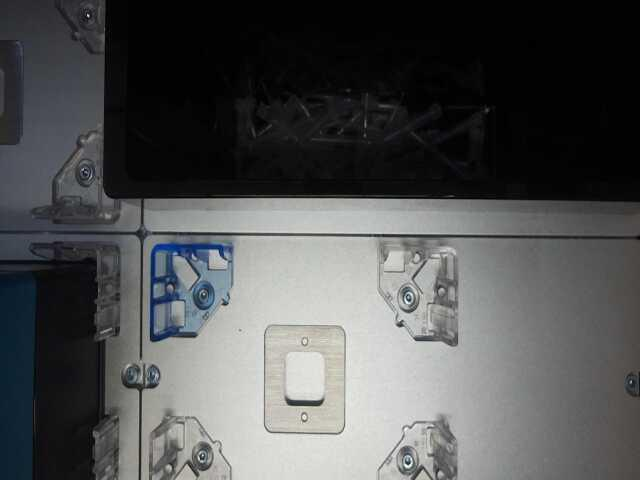

In [20]:
def get_single_image(stream_url = "http://192.168.0.125:8000/stream.mjpg",
                    filename = "image.jpg"):

    # Send a GET request to the stream
    response = requests.get(stream_url, stream=True)

    # Check if the request was successful
    if response.status_code == 200:
        # Read the stream content
        content = b""
        for chunk in response.iter_content(chunk_size=1024):
            content += chunk
            # Look for the JPEG start and end markers
            start = content.find(b'\xff\xd8')
            end = content.find(b'\xff\xd9')
            if start != -1 and end != -1:
                # Extract the JPEG image
                jpeg_data = content[start:end+2]
                # Open the image using PIL
                image = Image.open(BytesIO(jpeg_data))
                # Save the image as a .jpg file
                image.save(filename)
                return filename
    else:
        print(f"Failed to fetch stream. Status code: {response.status_code}")

if True: 
    filename = get_single_image(filename = "image.jpg")
    display(ipython_Image(filename = filename))

In [3]:
from PIL import Image

In [43]:
!wget http://192.168.0.125:8000/stream?action=snapshot -O snapshot.jpg

Connecting to 192.168.0.125:8000 (192.168.0.125:8000)
wget: server returned error: HTTP/1.0 404 Not Found


In [1]:
!PIP_CONFIG_FILE=/dev/null pip install opencv-python

/bin/sh: line 1: pip: command not found


In [2]:
import os 
os.getcwd()

'/var/lib/jupyter/notebooks/soap_mixing'